In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from datetime import datetime

In [2]:
path = '/Users/danielheaver/Desktop/projects/fantasy_football_predictions/'
gameweeks = pd.read_csv(path + 'CSV/all_gameweeks.csv')
model_scores = pd.read_csv(path + 'CSV/model_scores.csv')
display(model_scores.set_index('Model'))

,Mean CV Score,Train Score,Test Score,Precision Score,Recall Score,f1 Score,Time Taken (s)
Model,,,,,,,
"LogisticRegression(class_weight='balanced', max_iter=5000, penalty='l1',\n solver='liblinear')",0.680534,0.705923,0.678936,0.686440,0.678936,0.680666,0 days 00:11:09.215190
"LogisticRegression(class_weight='balanced', max_iter=5000, n_jobs=-1)",0.624962,0.663488,0.626608,0.705983,0.626608,0.656367,0 days 00:09:14.497207
"LogisticRegression(class_weight='balanced', l1_ratio=0.9, max_iter=6000,\n n_jobs=-1, penalty='elasticnet', solver='saga')",0.564372,0.660828,0.652106,0.674029,0.652106,0.660826,0 days 08:37:38.985897
KNeighborsClassifier(),0.691289,0.758862,0.700665,0.630269,0.700665,0.655743,0 days 01:24:45.190252
GaussianNB(),0.108013,0.112836,0.100000,0.638830,0.100000,0.098153,0 days 00:00:07.347964
MultinomialNB(),0.650600,0.663987,0.651109,0.579568,0.651109,0.600090,0 days 00:00:02.060046
ComplementNB(),0.553286,0.581141,0.562860,0.607131,0.562860,0.579221,0 days 00:00:01.255526
BernoulliNB(),0.628814,0.637351,0.628492,0.604144,0.628492,0.609465,0 days 00:00:04.176331
DecisionTreeClassifier(class_weight='balanced'),0.648715,1.000000,0.650443,0.656834,0.650443,0.653521,0 days 00:00:13.382180


In [3]:
baseline = max(gameweeks['shift_points_range'].value_counts(normalize=True))
print(baseline)

0.6679527262245283


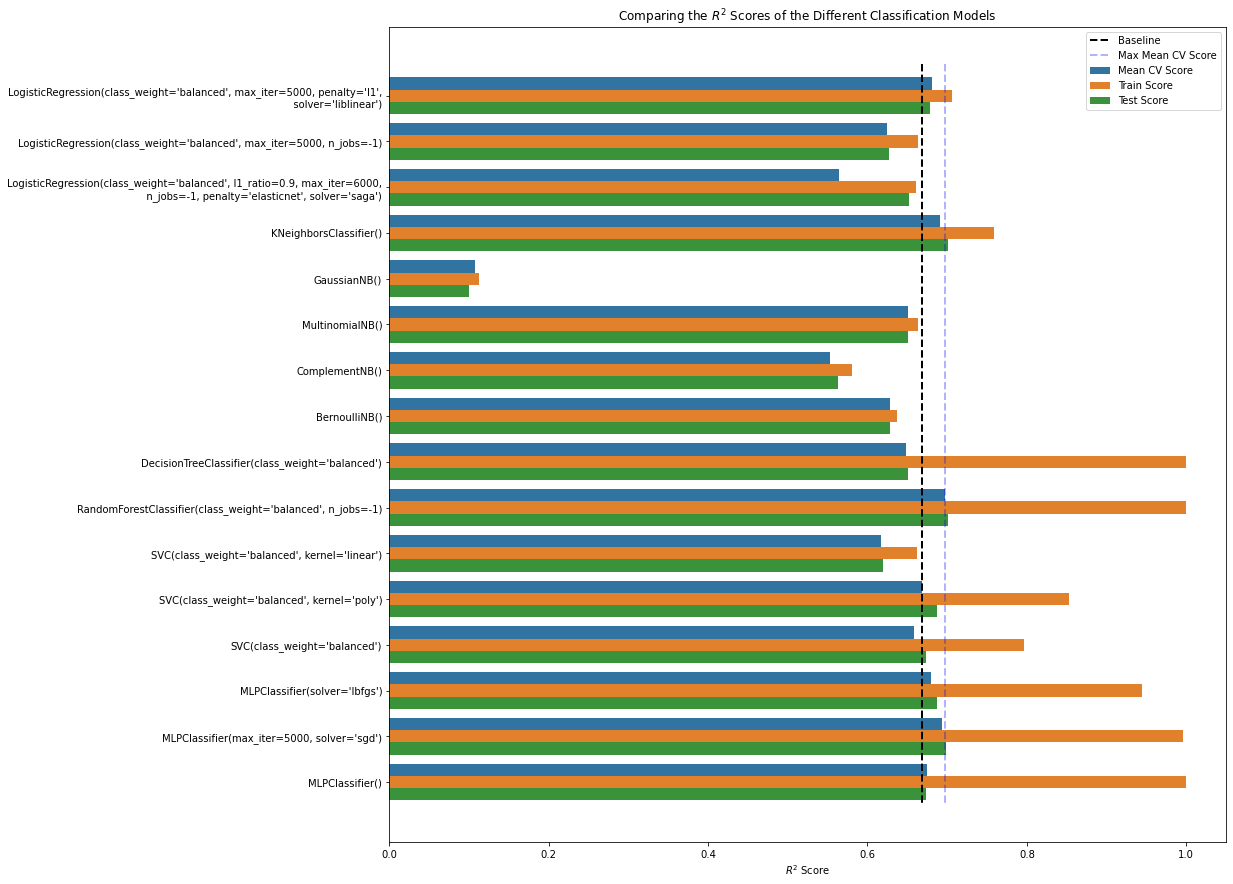

In [4]:
plt.figure(figsize = (15, 15))
plt.title('Comparing the $R^2$ Scores of the Different Classification Models')

sns.barplot(data=model_scores[['Model', 'Mean CV Score', 'Train Score', 'Test Score']].melt(id_vars='Model').rename(columns=str.title), x='Value', y='Model', hue='Variable')
plt.vlines(x=baseline, ymin=-0.7, ymax=15.5, color='k', linestyle="--", linewidth=2, label='Baseline')
plt.vlines(x=max(model_scores['Mean CV Score']), ymin=-0.7, ymax=15.5, color='blue', linestyle='--', linewidth=2, alpha=0.3, label='Max Mean CV Score')

plt.legend()
plt.xlabel('$R^2$ Score')
plt.ylabel('')
plt.savefig('IMAGES/model_r2_scores.png')
plt.show()

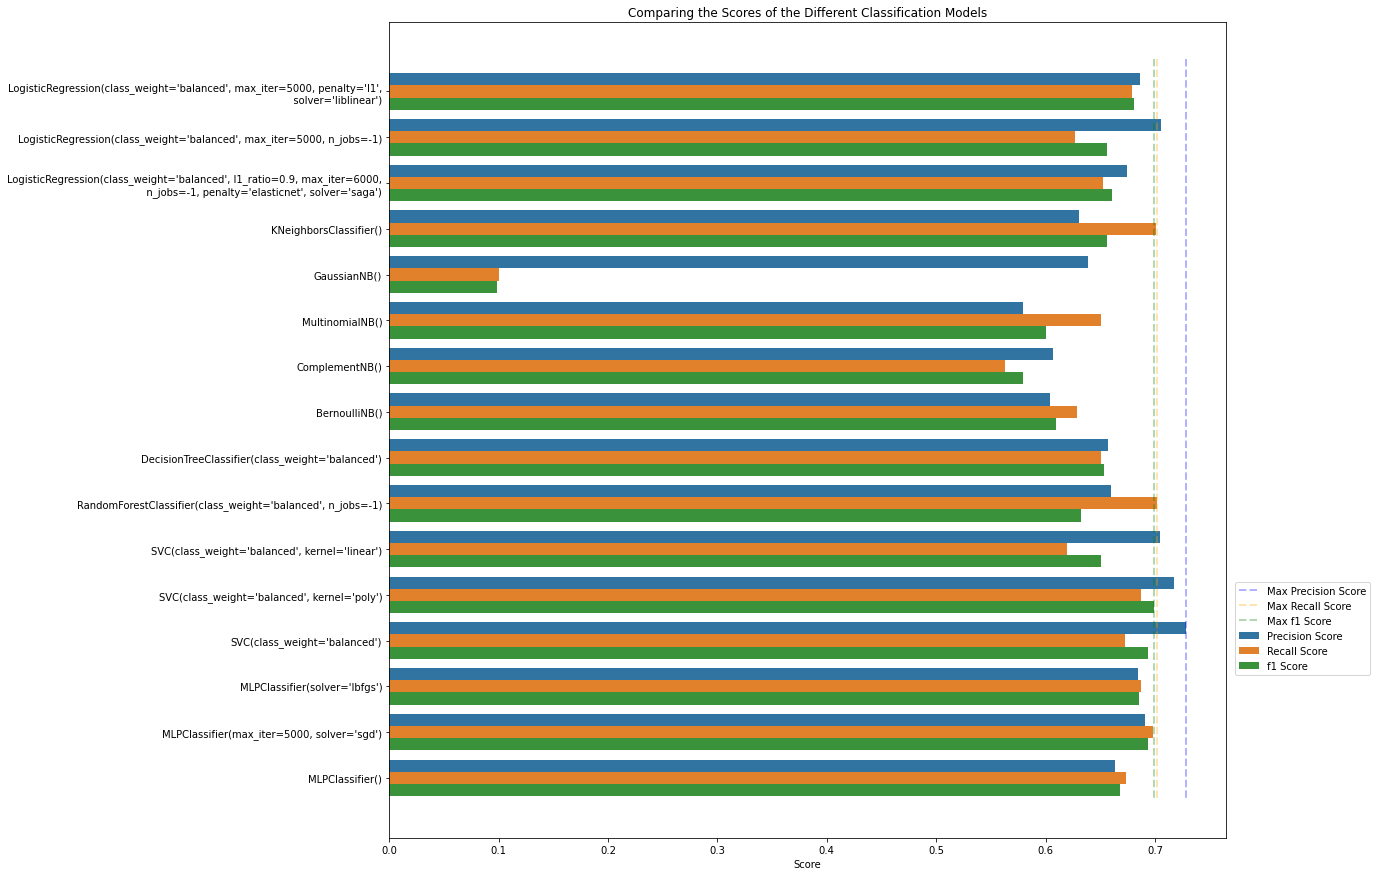

In [5]:
plt.figure(figsize = (15, 15))
plt.title('Comparing the Scores of the Different Classification Models')

sns.barplot(data=model_scores[['Model', 'Precision Score', 'Recall Score', 'f1 Score']].melt(id_vars='Model').rename(columns=str.title), x='Value', y='Model', hue='Variable')
plt.vlines(x=max(model_scores['Precision Score']), ymin=-0.7, ymax=15.5, color='blue', linestyle='--', linewidth=2, alpha=0.3, label='Max Precision Score')
plt.vlines(x=max(model_scores['Recall Score']), ymin=-0.7, ymax=15.5, color='orange', linestyle='--', linewidth=2, alpha=0.3, label='Max Recall Score')
plt.vlines(x=max(model_scores['f1 Score']), ymin=-0.7, ymax=15.5, color='green', linestyle='--', linewidth=2, alpha=0.3, label='Max f1 Score')

plt.legend(loc=[1.01, 0.2])
plt.xlabel('Score')
plt.ylabel('')
plt.savefig('IMAGES/model_scores.png')
plt.show()

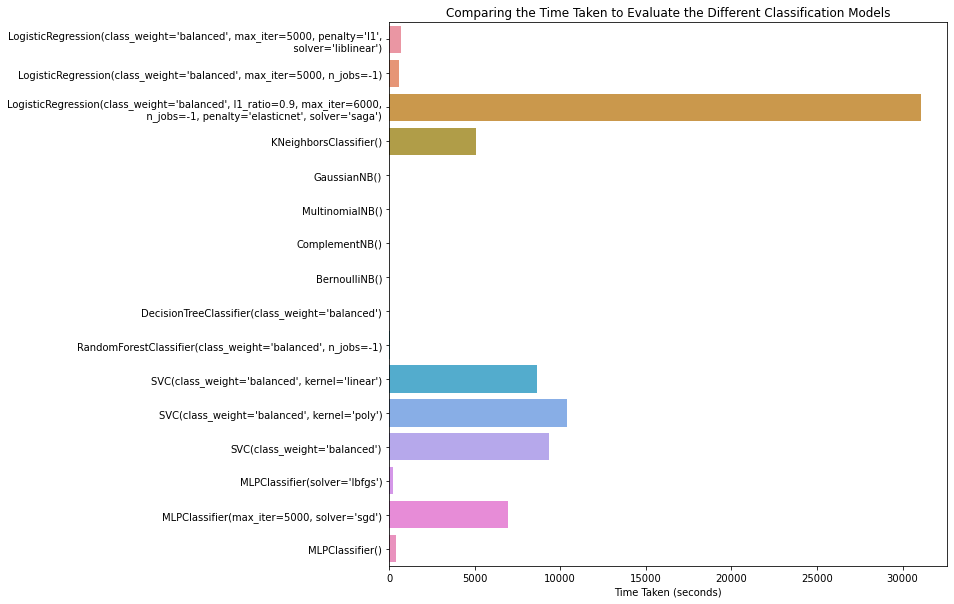

In [6]:
model_scores['Time Taken (s)'] = [float(time[0])*3600 + float(time[1])*60 + float(time[2]) for time in [time_string.split(sep=' ')[2:][0].split(sep=':') for time_string in model_scores['Time Taken (s)']]]

plt.figure(figsize = (10, 10))
plt.title('Comparing the Time Taken to Evaluate the Different Classification Models')


sns.barplot(data=model_scores[['Model', 'Time Taken (s)']].melt(id_vars="Model").rename(columns=str.title), x='Value', y='Model')

plt.xlabel('Time Taken (seconds)')
plt.ylabel('')
plt.savefig('IMAGES/model_time_taken.png')
plt.show()